<a href="https://colab.research.google.com/github/HowardWei123/EmotionAI/blob/colab/Emotion_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dependencies**

In [1]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# **Test**

Original Data: https://www.kaggle.com/datasets/msambare/fer2013/data

In [ ]:
!unzip /content/FER_2013_80-20_Dataset.zip

In [26]:
img_array = cv2.imread("/content/FER2013Dataset/train/surprise/Training_8796.jpg")
img_array.shape

(48, 48, 3)

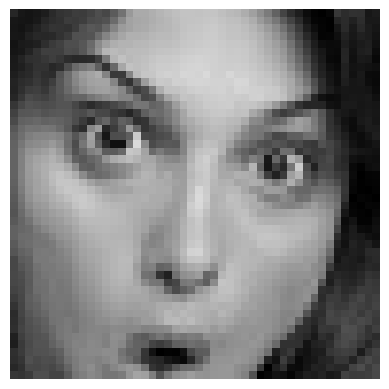

In [25]:
plt.axis('off')
plt.imshow(img_array)

# **Data**

Original Dataset String: "/content/trainORtest"

Modified Dataset String: "/content/FER2013Dataset/trainORtest"

In [4]:
Datadirectory = "/content/FER2013Dataset/train"

**Original Train**: [anger: 3995, disgust: 436, fear: 4097, happy: 7215, neutral: 4965, sad: 4830, surprise: 3171]

**Modified Train**: [anger: 2000, disgust: 436, fear: 2000, happy: 2000, neutral: 2000, sad: 2000, surprise: 2000]

**Original Test**: [anger: 958, disgust: 111, fear: 1024, happy: 1774, neutral: 1233, sad: 1247, surprise: 831]

**Modified Test**: [anger: 500, disgust: 111, fear: 500, happy: 500, neutral: 500, sad: 500, surprise: 500]

In [5]:
Classes = ['anger','disgust','fear','happy','neutral','sad','surprise']

## **Read all images, resize, and convert into arrays**

In [6]:
def create_data( data ):
  for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img) )
        new_array = cv2.resize(img_array, (180, 180) )
        data.append( [new_array, class_num] )
      except Exception as e:
        pass

In [7]:
training_data = []
create_data(training_data)

In [8]:
testing_data = []
Datadirectory = "/content/FER2013Dataset/test"
create_data(testing_data)

In [9]:
print( len(training_data) )
print( len(testing_data) )

12436
3111


## **Create Training and Testing Data Arrays**

In [10]:
import random

random.shuffle(training_data)
random.shuffle(testing_data)

In [11]:
def create_train_test(data, x, y):
  for features, label in data:
    x.append(features)
    y.append(label)

In [12]:
x_train = []
y_train = []

x_test = []
y_test = []

create_train_test(training_data, x_train, y_train)
create_train_test(testing_data, x_test, y_test)

In [13]:
X_train = np.array(x_train).reshape(-1, 180, 180, 3)
Y_train = np.array(y_train)

X_test = np.array(x_test).reshape(-1, 180, 180, 3)
Y_test = np.array(y_test)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### **Correct Dataset Imbalances**

```
# import imblearn random oversampler
# create instance of randomoversampler
# drop disgust from xtrain, ytrain, xtest, ytest
# oversample droppped disgust
# add rebalanced data back to training testing sets
# retrain model and test
```



# **Model Training and Testing**

In [19]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')
])

In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [21]:
model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
389/389 [==============================] - 43s 107ms/step - loss: 1.7881 - accuracy: 0.2687
Epoch 2/30
389/389 [==============================] - 40s 104ms/step - loss: 1.5870 - accuracy: 0.3842
Epoch 3/30
389/389 [==============================] - 39s 100ms/step - loss: 1.3807 - accuracy: 0.4738
Epoch 4/30
389/389 [==============================] - 40s 103ms/step - loss: 1.1575 - accuracy: 0.5659
Epoch 5/30
389/389 [==============================] - 40s 102ms/step - loss: 0.8574 - accuracy: 0.6860
Epoch 6/30
389/389 [==============================] - 41s 104ms/step - loss: 0.5274 - accuracy: 0.8159
Epoch 7/30
389/389 [==============================] - 40s 103ms/step - loss: 0.2814 - accuracy: 0.9058
Epoch 8/30
389/389 [==============================] - 40s 104ms/step - loss: 0.1547 - accuracy: 0.9540
Epoch 9/30
389/389 [==============================] - 41s 105ms/step - loss: 0.0846 - accuracy: 0.9786
Epoch 10/30
389/389 [==============================] - 40s 104ms/step - l

In [22]:
model.evaluate(X_test, Y_test)

98/98 [==============================] - 2s 22ms/step - loss: 6.3048 - accuracy: 0.4317


[6.3047661781311035, 0.43169400095939636]

In [ ]:
model.save('seqfermodel.h5')

In [ ]:
model = keras.models.load_model('seqfermodel.h5')